In [1]:
setwd('/import/hd/sc')

In [3]:
fib = readRDS('./scRNA.fibro.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [2]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [5]:
Idents(fib) = 'celltype'

In [6]:
unique(fib$celltype)

[1] "MPC"         "Inter fibro" "LL fibro"    "preAD"

In [7]:
sce = subset(fib,idents = c('Inter fibro','LL fibro'))

In [8]:
immune.combined = sce

In [ ]:
ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")
testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 20, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:20)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.3)
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:20)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:20)
immune.combined = testAB.integrated

Computing 2000 integration features

Scaling features for provided objects



In [ ]:
# scRNAlist =  SplitObject(immune.combined, split.by = "orig.ident")
# scRNA_harmony <- merge(scRNAlist[[1]], y=scRNAlist[2:length(scRNAlist)])
# DefaultAssay(scRNA_harmony) = 'RNA'
# library(harmony)
# scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
# ##整合
# system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
# scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:50)
# scRNA_harmony <- RunTSNE(scRNA_harmony, reduction = "harmony", dims = 1:50)
# scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:50) %>% FindClusters(resolution =  0.3)

In [ ]:
immune.combined = testAB.integrated

In [ ]:
DimPlot(immune.combined,label = T)

In [ ]:
immune.combined$seurat_clusters = gsub(6,0,immune.combined$seurat_clusters)

In [ ]:
immune.combined$seurat_clusters = gsub(5,0,immune.combined$seurat_clusters)

In [ ]:
immune.combined$seurat_clusters = factor(immune.combined$seurat_clusters,levels = c(0,1,2,3,4))

In [ ]:
Idents(immune.combined) = 'seurat_clusters'

In [ ]:
DefaultAssay(immune.combined) = 'RNA'

In [ ]:
a = as.matrix(immune.combined@assays$RNA@data)

In [ ]:
b = grep('^TGF',rownames(a),value = T)

In [ ]:
DotPlot(immune.combined,features = 'HIF1A')+coord_flip()

In [60]:
DefaultAssay(immune.combined) = 'RNA'
sce.markers <- FindAllMarkers(object = immune.combined, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4



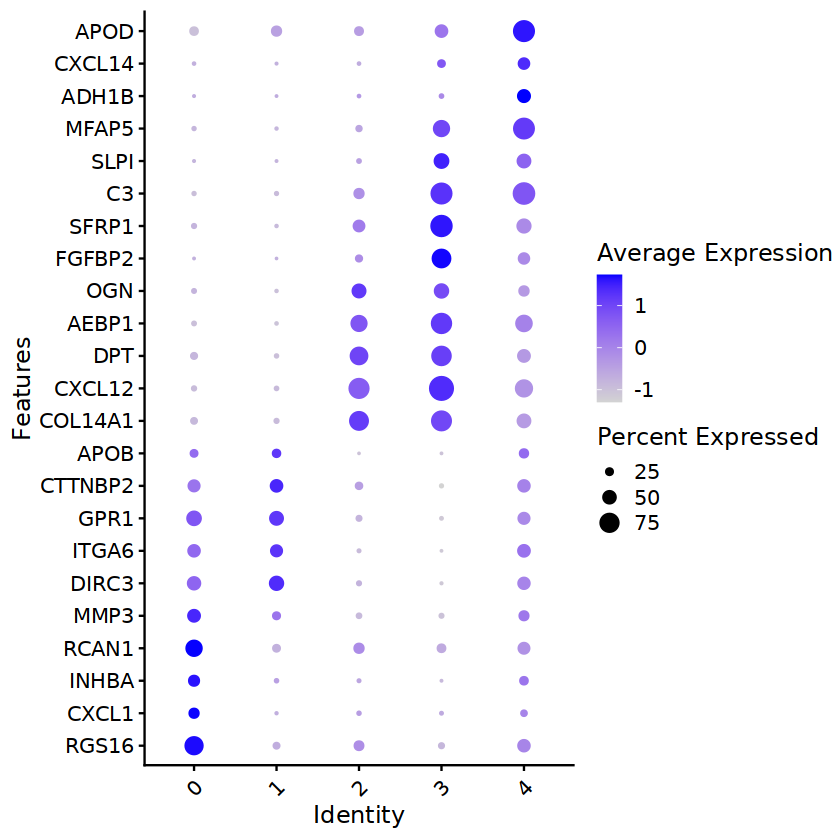

In [65]:
library(dplyr) 
library(ggplot2)
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)
options(repr.plot.height = 7,repr.plot.width = 7)
 DotPlot(immune.combined, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [67]:
immune.combined$celltype = paste0('Fib',immune.combined$seurat_clusters)

In [68]:
saveRDS(immune.combined,file  ='scRNA.fibro2.rds')

In [3]:
SCE = readRDS('scRNA.fibro2.rds')

In [4]:
Idents(SCE) = 'celltype'

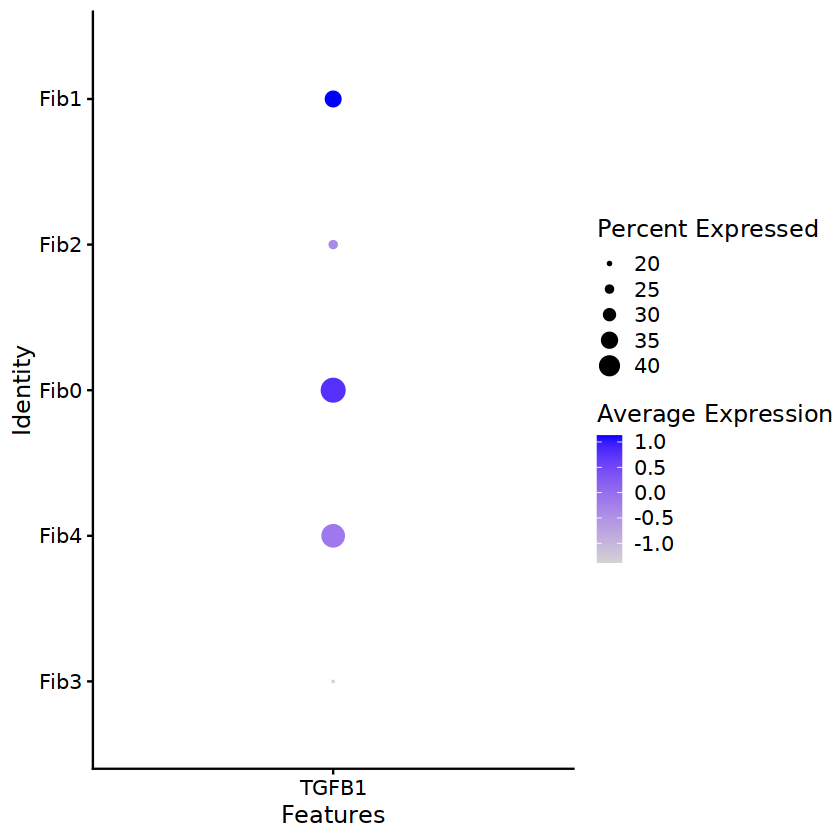

In [7]:
DotPlot(SCE,features = 'TGFB1')